In [ ]:
pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 83.3 MB/s eta 0:00:00


In [ ]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    """Extracts text from each page of a PDF file."""
    doc = fitz.open(pdf_path)
    text_data = []
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text_data.append(page.get_text())
    return text_data

# Path to your downloaded annual report
pdf_path = '/content/drive/MyDrive/sem/nlp/Asian Paints IR 2024-25 (1).pdf'
all_text = extract_text_from_pdf(pdf_path)

print(f"Successfully read {len(all_text)} pages from the PDF.")

Successfully read 282 pages from the PDF.


In [ ]:
import pandas as pd

# Create a DataFrame from the extracted text
df = pd.DataFrame({'page_text': all_text})
df['page_num'] = df.index + 1

print("DataFrame created successfully:")
print(df.head())

DataFrame created successfully:
                                           page_text  page_num
0  Bringing joy \nto people's lives \nElevate. Ev...         1
1  CREATING IMPACT\nAbout this report\n2\nIntegr...         2
2  ABOUT THIS REPORT\nForward-looking statements\...         3
3  We remain committed to \ntransparency. Our rob...         4
4  33%\nReduction in our absolute Scope \n1 and 2...         5


In [ ]:
pip install nltk

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (only need to do this once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

def preprocess_text(text):
    """Cleans and preprocesses a single string of text."""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation, digits, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

# Apply the preprocessing function to the 'page_text' column
df['processed_text'] = df['page_text'].apply(preprocess_text)

print("Text preprocessing complete:")
print(df[['page_num', 'processed_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Text preprocessing complete:
   page_num                                     processed_text
0         1  bringing joy peoples lives elevate evolve engr...
1         2  creating impact report integrated thinking asi...
2         3  report forwardlooking statements certain state...
3         4  remain committed transparency robust governanc...
4         5  reduction absolute scope ghg emissions compare...


In [ ]:
from textblob import TextBlob

def get_sentence_sentiment(text):
    """Performs sentence tokenization and sentiment analysis."""
    sentences = TextBlob(text).sentences
    sentiments = []
    for sentence in sentences:
        sentiment = sentence.sentiment
        sentiments.append({
            'sentence': str(sentence),
            'polarity': sentiment.polarity,
            'subjectivity': sentiment.subjectivity
        })
    return sentiments

# Apply the function to the original text to retain sentence structure
df['sentiment'] = df['page_text'].apply(get_sentence_sentiment)

# Displaying the sentiment of the first page
print("Sentiment analysis for the first page:")
print(pd.DataFrame(df['sentiment'][0]).head())

Sentiment analysis for the first page:
                                      sentence  polarity  subjectivity
0  Bringing joy \nto people's lives \nElevate.       0.8           0.2
1                                      Evolve.       0.0           0.0
2                                     Engrave.       0.0           0.0
3          ®\nIntegrated Annual Report 2024-25       0.0           0.0


In [ ]:
pip install textblob

In [ ]:
def word_tokenize_and_preprocess(text):
    """Tokenizes and preprocesses text into a list of words."""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply the function
df['tokenized_text'] = df['processed_text'].apply(word_tokenize_and_preprocess)

print("Word tokenization and preprocessing complete:")
print(df[['page_num', 'tokenized_text']].head())

Word tokenization and preprocessing complete:
   page_num                                     tokenized_text
0         1  [bringing, joy, peoples, lives, elevate, evolv...
1         2  [creating, impact, report, integrated, thinkin...
2         3  [report, forwardlooking, statements, certain, ...
3         4  [remain, committed, transparency, robust, gove...
4         5  [reduction, absolute, scope, ghg, emissions, c...


In [ ]:
pip install wordcloud matplotlib

Most frequent words:
[('company', 1764), ('financial', 1426), ('year', 1364), ('limited', 973), ('paints', 927), ('asian', 820), ('report', 713), ('value', 680), ('st', 609), ('board', 593)]


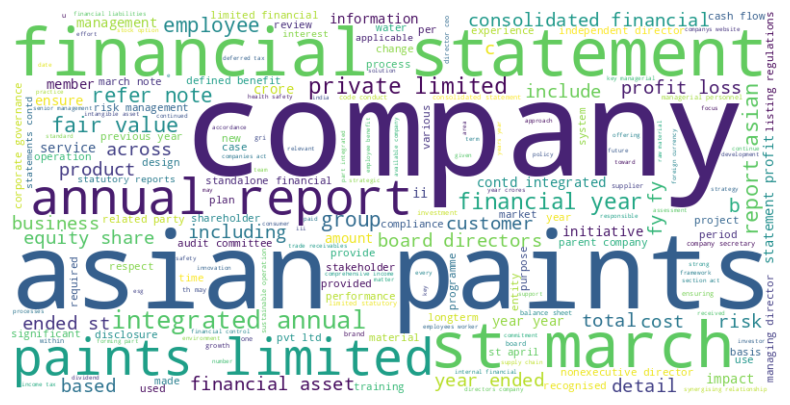

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokenized words into a single list
all_words = [word for tokens in df['tokenized_text'] for word in tokens]

# Get the most common words
word_freq = Counter(all_words)
print("Most frequent words:")
print(word_freq.most_common(10))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000) # You can adjust max_features

# Fit and transform the processed text
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

# Get the feature names (the words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print("TF-IDF Matrix created successfully:")
print(tfidf_df.head())

TF-IDF Matrix created successfully:
   academy  access  accordance  accordingly  account  accountability  \
0  0.00000     0.0    0.000000          0.0      0.0        0.000000   
1  0.00000     0.0    0.000000          0.0      0.0        0.000000   
2  0.00000     0.0    0.082545          0.0      0.0        0.000000   
3  0.00000     0.0    0.000000          0.0      0.0        0.049652   
4  0.12577     0.0    0.000000          0.0      0.0        0.000000   

   accountants  accounting  accounts  achieved  ...  workers  working  \
0          0.0    0.000000       0.0       0.0  ...      0.0      0.0   
1          0.0    0.000000       0.0       0.0  ...      0.0      0.0   
2          0.0    0.032806       0.0       0.0  ...      0.0      0.0   
3          0.0    0.000000       0.0       0.0  ...      0.0      0.0   
4          0.0    0.000000       0.0       0.0  ...      0.0      0.0   

   workplace     world  would      year     years  yes  yesno  zero  
0   0.000000  0.000000

In [ ]:
pip install gensim

In [ ]:
import gensim
from gensim import corpora

# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(df['tokenized_text'])

# Create a corpus (a list of bag-of-words representations)
corpus = [dictionary.doc2bow(text) for text in df['tokenized_text']]

# Build the LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Print the topics and their top words
print("\nLDA Topic Modeling Results (10 Topics):")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")


LDA Topic Modeling Results (10 Topics):
Topic: 0 
Words: 0.029*"fy" + 0.029*"employees" + 0.023*"safety" + 0.019*"workers" + 0.011*"health" + 0.011*"total" + 0.010*"permanent" + 0.008*"training" + 0.007*"relationships" + 0.006*"synergising"
Topic: 1 
Words: 0.010*"rights" + 0.008*"human" + 0.007*"discrimination" + 0.007*"bargaining" + 0.006*"child" + 0.006*"labour" + 0.004*"demand" + 0.004*"collective" + 0.004*"inclusion" + 0.004*"forced"
Topic: 2 
Words: 0.026*"water" + 0.016*"waste" + 0.016*"brsr" + 0.016*"operations" + 0.013*"energy" + 0.012*"scope" + 0.012*"sustainable" + 0.011*"emissions" + 0.011*"total" + 0.010*"fy"
Topic: 3 
Words: 0.009*"paints" + 0.008*"across" + 0.007*"business" + 0.007*"asian" + 0.006*"risk" + 0.005*"management" + 0.005*"products" + 0.004*"new" + 0.004*"product" + 0.004*"year"
Topic: 4 
Words: 0.038*"ltd" + 0.025*"pvt" + 0.019*"trading" + 0.017*"related" + 0.017*"choksi" + 0.015*"paints" + 0.013*"asian" + 0.013*"investments" + 0.013*"party" + 0.012*"transac

In [ ]:
# In your Colab notebook, after all processing...

import json
from collections import Counter

# ... (your existing processing code) ...

# Example: Save the DataFrame with sentiment scores
df.to_csv('report_analysis.csv', index=False)

# Example: Save the word frequency list
all_words = [word for tokens in df['tokenized_text'] for word in tokens]
word_freq = Counter(all_words)
with open('word_frequency.json', 'w') as f:
    json.dump(word_freq.most_common(20), f)

# Download the files to your computer
from google.colab import files
files.download('report_analysis.csv')
files.download('word_frequency.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

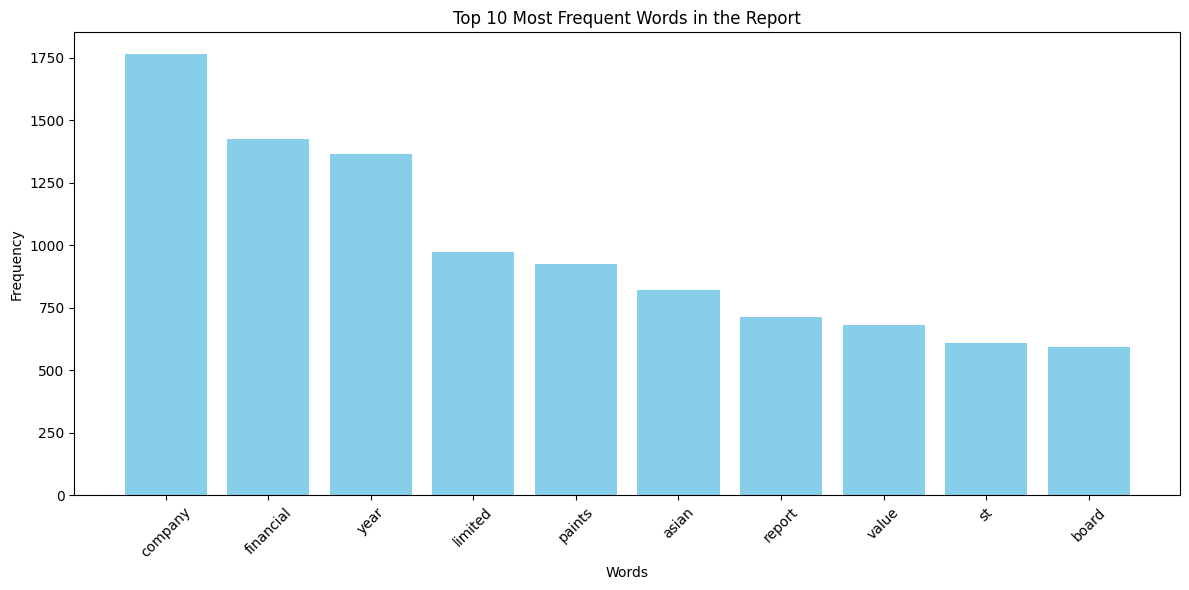

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the top 10 most frequent words
word_freq_data = [('company', 1764), ('financial', 1426), ('year', 1364),
                  ('limited', 973), ('paints', 927), ('asian', 820),
                  ('report', 713), ('value', 680), ('st', 609), ('board', 593)]

# Create a DataFrame for plotting
df_freq = pd.DataFrame(word_freq_data, columns=['Word', 'Frequency'])
df_freq = df_freq.sort_values(by='Frequency', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_freq['Word'], df_freq['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in the Report')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

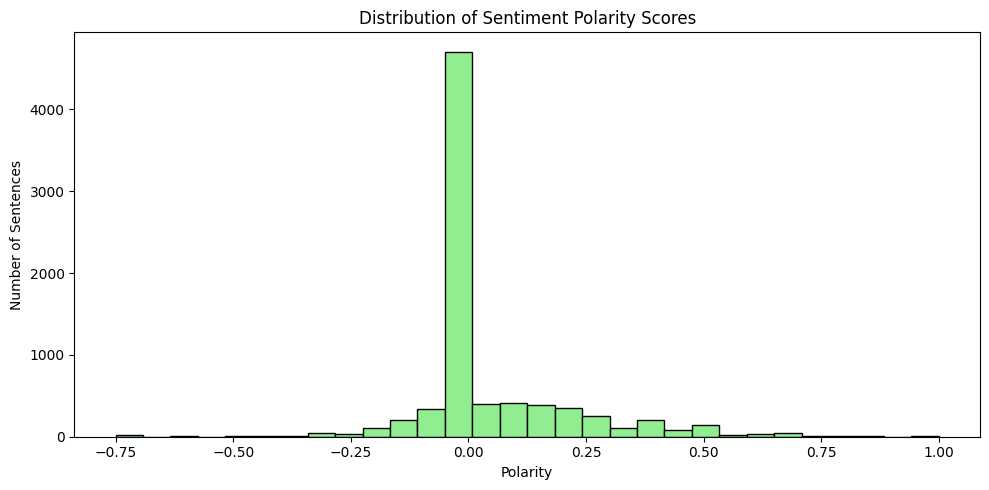

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# First, ensure your sentiment data is in the correct format.
# This code unnests the list of sentiment dictionaries into separate rows.
df_sentiment = df.explode('sentiment')
df_sentiment = pd.concat([df_sentiment.drop(['sentiment'], axis=1),
                          df_sentiment['sentiment'].apply(pd.Series)], axis=1)

# Now, plot the histogram of polarity scores
plt.figure(figsize=(10, 5))
plt.hist(df_sentiment['polarity'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Polarity')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Sentiment Polarity Scores')
plt.tight_layout()
plt.show()